#### Zugriff aus python mit Hilfe von Pandas

In [2]:
import sqlite3 as sql
import pandas as pd
import torch
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib
import dateutil
import datetime

Baue eine Verbindung zur meiner Datenbank auf:

In [45]:
conn = sql.connect('../data/20190331_schmidt_home-assistant_v2.db')

### Die Daten aus der SQL mit Hilfe von Pandas auslesen

Tabellennamen ermitteln

In [46]:
table_names = pd.read_sql_query('select name from sqlite_master where type = "table"', conn)
table_names

,name
0,events
1,recorder_runs
2,schema_changes
3,states


Tabelle events einlesen

In [47]:
events = pd.read_sql_query('select * from events', conn)

In [48]:
events.tail(100)

,event_id,event_type,event_data,origin,time_fired,created,context_id,context_user_id
15230,28671,state_changed,"{""entity_id"": ""sensor.living_room_wt_current_t...",LOCAL,2019-03-31 15:43:46.015754,2019-03-31 15:43:46.028529,962a89379e534c26a96722ecb5e7a59e,None
15231,28672,state_changed,"{""entity_id"": ""sensor.kitchen_wt_current_tempe...",LOCAL,2019-03-31 15:44:47.017743,2019-03-31 15:44:47.029235,2a877e7ae70341fd8123d1345186f773,None
15232,28673,state_changed,"{""entity_id"": ""sensor.living_room_wt_current_t...",LOCAL,2019-03-31 15:46:49.015508,2019-03-31 15:46:49.027896,47b4975465df4b05a205cbfff0a00183,None
15233,28674,state_changed,"{""entity_id"": ""sensor.bath_wt_current_temperat...",LOCAL,2019-03-31 15:46:49.029635,2019-03-31 15:46:49.092149,651390a05729466b8148474a7e173053,None
15234,28675,state_changed,"{""entity_id"": ""sensor.kitchen_wt_current_tempe...",LOCAL,2019-03-31 15:46:49.043030,2019-03-31 15:46:49.164379,8af4d1dbed674a9ebf9c6f4350384eea,None
15235,28676,state_changed,"{""entity_id"": ""sensor.kitchen_wt_current_tempe...",LOCAL,2019-03-31 15:49:52.886263,2019-03-31 15:49:52.898387,2d14e664dcbf40bdbba508d9f520fc27,None
15236,28677,state_changed,"{""entity_id"": ""sensor.living_room_wt_current_t...",LOCAL,2019-03-31 15:49:52.906291,2019-03-31 15:49:52.965336,6d1e19db5b63491ab44128d9773e43cb,None
15237,28678,state_changed,"{""entity_id"": ""sensor.bath_wt_current_temperat...",LOCAL,2019-03-31 15:52:56.873406,2019-03-31 15:52:56.887673,71dffa3dac1b4c29a70eeff4bfe05c2e,None
15238,28679,state_changed,"{""entity_id"": ""sensor.living_room_wt_current_t...",LOCAL,2019-03-31 15:52:56.904846,2019-03-31 15:52:56.960329,6c6be77df21d44b3950485a4aba6240e,None
15239,28680,state_changed,"{""entity_id"": ""sensor.bath_wt_current_temperat...",LOCAL,2019-03-31 15:55:57.013823,2019-03-31 15:55:57.027988,a2d372b68d3d4dbda2c00458f4ca6c52,None


#### Tabelle recorder_runs einlesen

In [49]:
recorder_runs = pd.read_sql_query('select * from recorder_runs', conn)

In [50]:
recorder_runs.head()

,run_id,start,end,closed_incorrect,created
0,1,2019-03-14 20:25:23.434947,2019-03-14 20:30:46.775168,0,2019-03-14 20:25:26.805756
1,2,2019-03-14 20:30:58.627587,2019-03-14 20:34:30.843322,0,2019-03-14 20:31:01.310771
2,3,2019-03-14 20:34:43.543716,2019-03-14 20:37:48.007651,0,2019-03-14 20:34:46.236966
3,4,2019-03-14 20:37:59.974984,2019-03-14 20:42:23.147717,0,2019-03-14 20:38:02.612598
4,5,2019-03-14 20:42:35.949202,2019-03-14 20:59:04.860145,0,2019-03-14 20:42:38.634857


#### Tabelle schema_changes einlesen

In [51]:
schema_changes = pd.read_sql_query('select * from schema_changes', conn)

In [52]:
schema_changes.head()

,change_id,schema_version,changed
0,1,7,2019-03-14 20:25:26.737487


#### Tabelle states einlesen

In [53]:
states = pd.read_sql_query('select * from states', conn)

In [54]:
states.tail(30)

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
14420,27290,sensor,sensor.living_room_ht_north_current_temperature,20.7,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",28741,2019-03-31 17:17:16.029015,2019-03-31 17:17:16.029015,2019-03-31 17:17:16.106799,8a0664dd6c4d4bd786793c93683b990a,None
14421,27291,sensor,sensor.living_room_wt_current_temperature,20.9,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",28742,2019-03-31 17:18:17.017738,2019-03-31 17:18:17.017738,2019-03-31 17:18:17.032567,c1c730489b8448b794bbfc8c756b7bb9,None
14422,27292,sensor,sensor.sleeping_room_wt_current_temperature,20.2,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",28743,2019-03-31 17:19:18.014430,2019-03-31 17:19:18.014430,2019-03-31 17:19:18.023846,2c0d83920b3c4aa6a1f8602e0bd414de,None
14423,27293,sensor,sensor.kitchen_wt_current_temperature,20.4,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",28744,2019-03-31 17:19:18.029695,2019-03-31 17:19:18.029695,2019-03-31 17:19:18.095080,25b6684e5c0d4d03b0592ba9af5188b3,None
14424,27294,sensor,sensor.bath_wt_current_temperature,21.1,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",28745,2019-03-31 17:21:20.017543,2019-03-31 17:21:20.017543,2019-03-31 17:21:20.057708,ecc4f6b6dda44d81879bdc06900a856f,None
14425,27295,sensor,sensor.sleeping_room_wt_current_temperature,20.4,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",28746,2019-03-31 17:24:24.875490,2019-03-31 17:24:24.875490,2019-03-31 17:24:24.906407,b44834bbb20c456ca7ca74d245a766aa,None
14426,27296,sensor,sensor.living_room_wt_current_temperature,21.0,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",28747,2019-03-31 17:24:24.890387,2019-03-31 17:24:24.890387,2019-03-31 17:24:24.977507,9927736a617544ab93e956797dbce7de,None
14427,27297,sensor,sensor.bath_wt_current_temperature,21.3,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",28748,2019-03-31 17:27:28.881826,2019-03-31 17:27:28.881826,2019-03-31 17:27:28.903145,5240c38449cc4c17838569f06fc6d24e,None
14428,27298,sensor,sensor.kitchen_wt_current_temperature,20.6,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",28749,2019-03-31 17:27:28.907483,2019-03-31 17:27:28.907483,2019-03-31 17:27:28.969702,24127f3b02284aa8b53d3a868ae35de1,None
14429,27299,sensor,sensor.sleeping_room_wt_current_temperature,20.6,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",28750,2019-03-31 17:30:29.022347,2019-03-31 17:30:29.022347,2019-03-31 17:30:29.041017,1daba5e356e844e5bc67fc1afd16295e,None


### Vertiefung der Datensuche in der states Tabelle entity sensor

In [55]:
sensor = states[states['entity_id'].str.contains('sensor')]

In [56]:
sensor.head()

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
47,12917,sensor,sensor.weather_dewpoint_temperature,7.8,"{""attribution"": ""Weather forecast from met.no,...",13488,2019-03-20 21:31:00.075074,2019-03-20 21:31:00.075074,2019-03-20 21:31:00.085491,2ad31ee7e10347beb94a1ef914a73703,None
48,12918,sensor,sensor.weather_wind_speed,2.6,"{""attribution"": ""Weather forecast from met.no,...",13489,2019-03-20 21:31:00.075538,2019-03-20 21:31:00.075538,2019-03-20 21:31:00.154218,237649161f024a0a8566bfa1ff399777,None
49,12919,sensor,sensor.weather_pressure,1032.2,"{""attribution"": ""Weather forecast from met.no,...",13490,2019-03-20 21:31:00.075905,2019-03-20 21:31:00.075905,2019-03-20 21:31:00.210628,348a48862f7a47fe99cec292b149769b,None
50,12920,sensor,sensor.weather_high_clouds,35.2,"{""attribution"": ""Weather forecast from met.no,...",13491,2019-03-20 21:31:00.076354,2019-03-20 21:31:00.076354,2019-03-20 21:31:00.278736,500b230d9eca46e4a9795217116537be,None
51,12921,sensor,sensor.weather_humidity,95.0,"{""attribution"": ""Weather forecast from met.no,...",13492,2019-03-20 21:31:00.076727,2019-03-20 21:31:00.076727,2019-03-20 21:31:00.344813,5d14a58812c2496ba44f10ea6fb8be12,None


In [65]:
state_sensor_living_room  = sensor[sensor['entity_id'].str.contains('living')]
state_sensor_living_room

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
8270,21140,sensor,sensor.living_room_wt_current_temperature,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22264,2019-03-25 19:57:44.973797,2019-03-25 19:57:44.973797,2019-03-25 19:57:52.070935,ce0fc3a423974300a3692d82d30655dc,None
8271,21141,sensor,sensor.living_room_wt_set_temperature,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22265,2019-03-25 19:57:44.974569,2019-03-25 19:57:44.974569,2019-03-25 19:57:52.136055,86d6f368cd094e108494d4086f90c220,None
8272,21142,sensor,sensor.living_room_wt_mode,unknown,"{""unit_of_measurement"": """", ""friendly_name"": ""...",22266,2019-03-25 19:57:44.975335,2019-03-25 19:57:44.975335,2019-03-25 19:57:52.200638,fe08497741454ef89601ce0c53f7518c,None
8273,21143,sensor,sensor.living_room_ht_south_current_temperature,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22267,2019-03-25 19:57:44.976205,2019-03-25 19:57:44.976205,2019-03-25 19:57:52.254811,aebbee5404cf4187bb0636b942519ed3,None
8274,21144,sensor,sensor.living_room_ht_south_set_temperature_bath,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22268,2019-03-25 19:57:44.977049,2019-03-25 19:57:44.977049,2019-03-25 19:57:52.315175,e598396b4caf420db8959e76cba927eb,None
8275,21145,sensor,sensor.living_room_ht_south_mode,unknown,"{""unit_of_measurement"": """", ""friendly_name"": ""...",22269,2019-03-25 19:57:44.977866,2019-03-25 19:57:44.977866,2019-03-25 19:57:52.376552,1198268b5e5e4f29b194fe06cf126691,None
8276,21146,sensor,sensor.living_room_ht_north_current_temperature,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22270,2019-03-25 19:57:44.978697,2019-03-25 19:57:44.978697,2019-03-25 19:57:52.435386,9f20634456b44ca1be6f8cbec30b0c4f,None
8277,21147,sensor,sensor.living_room_ht_north_set_temperature_bath,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22271,2019-03-25 19:57:44.979541,2019-03-25 19:57:44.979541,2019-03-25 19:57:52.484922,54fae313ec214491959b117a9b8040d9,None
8278,21148,sensor,sensor.living_room_ht_north_mode,unknown,"{""unit_of_measurement"": """", ""friendly_name"": ""...",22272,2019-03-25 19:57:44.980351,2019-03-25 19:57:44.980351,2019-03-25 19:57:52.548418,09e6f991d1a64fdfa4a4084584558e58,None
8310,21180,sensor,sensor.living_room_wt_current_temperature,20.3,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22337,2019-03-25 19:57:46.455667,2019-03-25 19:57:46.455667,2019-03-25 19:57:56.420053,bb15d6ccf39a409f9412be8b57570944,None


In [66]:
state_sensor_living_room_clean = state_sensor_living_room.loc[:,('entity_id','state','last_updated')]
state_sensor_living_room_clean = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('temperature')]
state_sensor_living_room_clean = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('wt')]
living_room_wt_tcurr = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('current')]
living_room_wt_tset = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('set')]


In [67]:
living_room_wt_tcurr['last_updated'] = living_room_wt_tcurr['last_updated'].map(lambda x: dateutil.parser.parse(x))

/Users/cm/anaconda3/envs/week_program/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
living_room_wt_tset['last_updated'] = living_room_wt_tset['last_updated'].map(lambda x: dateutil.parser.parse(x))

/Users/cm/anaconda3/envs/week_program/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
living_room_wt_tcurr = living_room_wt_tcurr[(living_room_wt_tcurr['last_updated'] > start_date) & (living_room_wt_tcurr['last_updated'] < end_date)]
living_room_wt_tcurr['state'] = living_room_wt_tcurr['state'].astype(float)

In [70]:
living_room_wt_tset = living_room_wt_tset[(living_room_wt_tset['last_updated'] > start_date) & (living_room_wt_tset['last_updated'] < end_date)]
living_room_wt_tset['state'] = living_room_wt_tset['state'].astype(float)

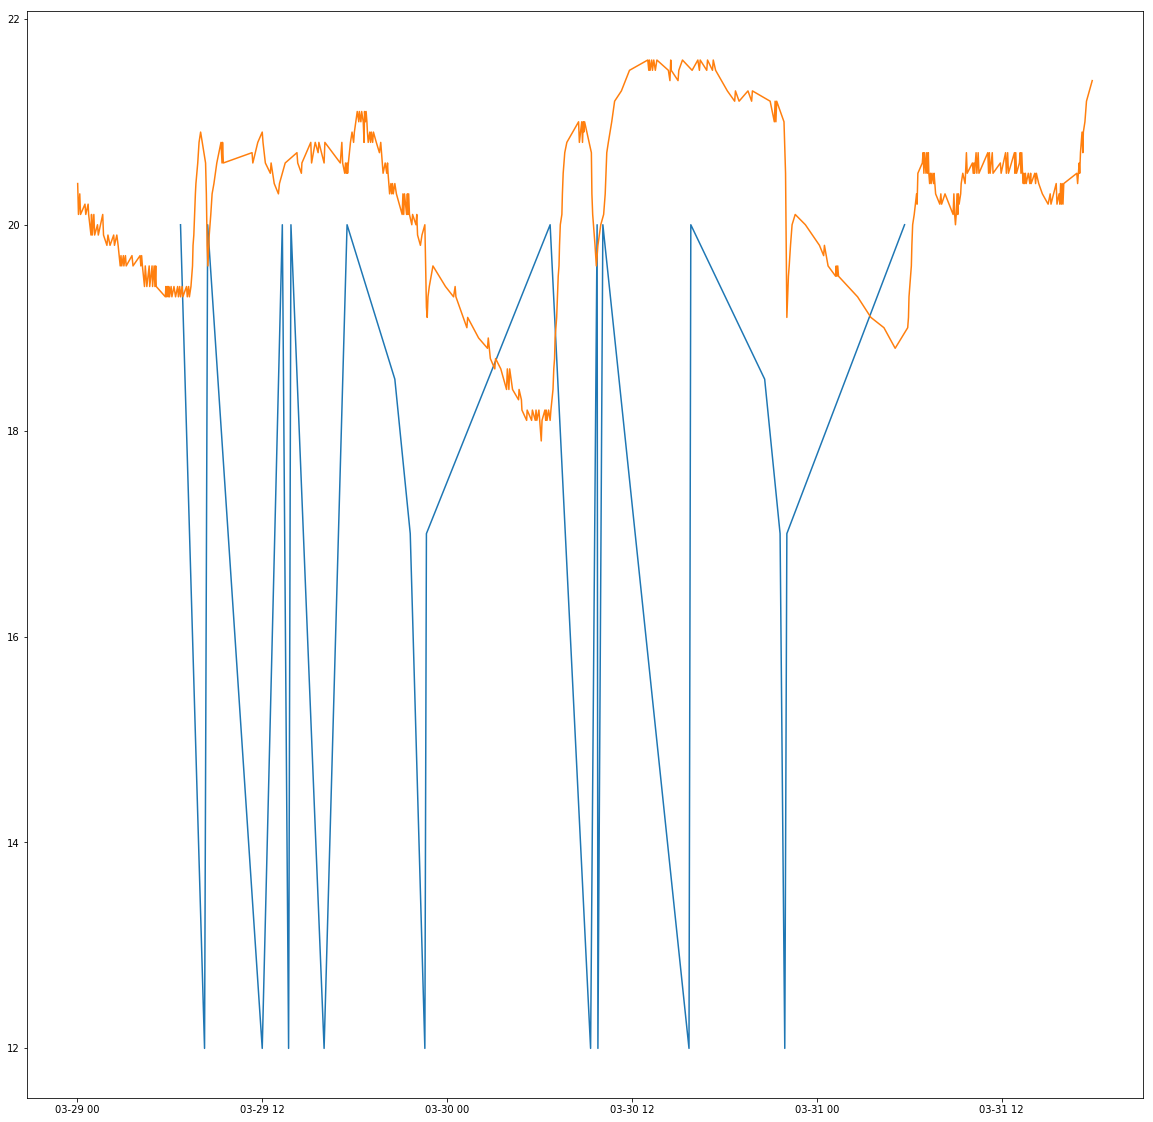

In [71]:
dates = matplotlib.dates.date2num(living_room_wt_tcurr['last_updated'])
fig1 = matplotlib.pyplot.figure(figsize=[20,20])
dates2 = matplotlib.dates.date2num(living_room_wt_tset['last_updated'])
matplotlib.pyplot.plot_date(dates2, living_room_wt_tset['state'], '-')
matplotlib.pyplot.plot_date(dates, living_room_wt_tcurr['state'], '-');

In [96]:
end_date = np.datetime64('2019-03-23 23:59:00')
start_date = np.datetime64('2019-03-23 00:00:00')

In [97]:
pd.read_sql_query('SELECT entity_id, COUNT(*) as count FROM states GROUP BY entity_id', conn).head()

,entity_id,count
0,binary_sensor.bad_fensterkontakt_bad,4
1,binary_sensor.kuche_fensterkontakt_ku,4
2,binary_sensor.schlafzimmer_fensterkontakt_sz,12
3,binary_sensor.wohnzimmer_fensterkontakt_nord,4
4,binary_sensor.wohnzimmer_fensterkontakt_sud,2


In [98]:
living_room_wt_tcurr = living_room_wt_tcurr[(living_room_wt_tcurr['last_updated'] > start_date) & (living_room_wt_tcurr['last_updated'] < end_date)]
living_room_wt_tcurr = living_room_wt_tcurr.sort_values(by=['state'])

### Vertiefung der Datensuche in der states Tabelle entity climate

In [99]:
climate = states[states['entity_id'].str.contains('climate')]

In [100]:
climate.head()

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
3,12873,climate,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.9, ""min_temp"": 4.5,...",13444,2019-03-19 12:22:26.931085,2019-03-20 20:53:59.890590,2019-03-20 20:53:59.915400,5a27e169c1704d6d9083b3503f74e4a6,None
19,12889,climate,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",13460,2019-03-19 12:22:26.931085,2019-03-20 21:09:14.906515,2019-03-20 21:09:14.926393,4e5ad7dcfb7e4d1593198d451e899254,None
20,12890,climate,climate.schlafzimmer_wandthermostat_sz,manual,"{""current_temperature"": 16.8, ""min_temp"": 4.5,...",13461,2019-03-19 12:22:26.960718,2019-03-20 21:09:14.920571,2019-03-20 21:09:14.991752,033186110c0b47bebaafcd4d16cc52d9,None
26,12896,climate,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.9, ""min_temp"": 4.5,...",13467,2019-03-19 12:22:26.931085,2019-03-20 21:14:19.924857,2019-03-20 21:14:19.933029,468fcc6383744787bbf6547df5f5a7e0,None
37,12907,climate,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",13478,2019-03-19 12:22:26.931085,2019-03-20 21:24:29.926726,2019-03-20 21:24:29.942735,e68384796c13435d9b107405f4e42091,None


In [101]:
state_climate_living_room  = climate[climate['entity_id'].str.contains('wohn')]
state_climate_living_room.head()

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
3,12873,climate,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.9, ""min_temp"": 4.5,...",13444,2019-03-19 12:22:26.931085,2019-03-20 20:53:59.890590,2019-03-20 20:53:59.915400,5a27e169c1704d6d9083b3503f74e4a6,None
19,12889,climate,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",13460,2019-03-19 12:22:26.931085,2019-03-20 21:09:14.906515,2019-03-20 21:09:14.926393,4e5ad7dcfb7e4d1593198d451e899254,None
26,12896,climate,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.9, ""min_temp"": 4.5,...",13467,2019-03-19 12:22:26.931085,2019-03-20 21:14:19.924857,2019-03-20 21:14:19.933029,468fcc6383744787bbf6547df5f5a7e0,None
37,12907,climate,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",13478,2019-03-19 12:22:26.931085,2019-03-20 21:24:29.926726,2019-03-20 21:24:29.942735,e68384796c13435d9b107405f4e42091,None
45,12915,climate,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.9, ""min_temp"": 4.5,...",13486,2019-03-19 12:22:26.931085,2019-03-20 21:29:33.941955,2019-03-20 21:29:34.014132,b04a86ff35334ef4bbccca8399551715,None


In [102]:
state_climate_living_room = state_climate_living_room.loc[:,('entity_id','state','attributes','last_updated')]
state_climate_living_room

,entity_id,state,attributes,last_updated
3,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.9, ""min_temp"": 4.5,...",2019-03-20 20:53:59.890590
19,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",2019-03-20 21:09:14.906515
26,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.9, ""min_temp"": 4.5,...",2019-03-20 21:14:19.924857
37,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",2019-03-20 21:24:29.926726
45,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.9, ""min_temp"": 4.5,...",2019-03-20 21:29:33.941955
59,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",2019-03-20 21:34:38.952963
65,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.9, ""min_temp"": 4.5,...",2019-03-20 21:39:43.945832
72,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",2019-03-20 21:44:47.966793
89,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.9, ""min_temp"": 4.5,...",2019-03-20 22:00:01.852181
98,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",2019-03-20 22:05:06.875616


In [103]:
state_climate_living_room['last_updated'] = state_climate_living_room['last_updated'].map(lambda x: dateutil.parser.parse(x))

In [123]:
state_climate_living_room['last_updated'].dt.time

4060    00:19:39.944872
4068    00:24:44.958159
4126    01:05:23.890125
4132    01:10:28.873845
4145    01:20:37.891567
4247    02:31:46.868982
4254    02:36:51.859056
4305    03:22:36.903224
4327    03:32:46.910492
4334    03:37:51.936440
4340    03:42:56.920401
4347    03:48:01.939091
4353    03:53:06.929272
4378    04:13:26.840318
4386    04:18:31.851066
4440    04:54:04.898328
4446    04:59:08.880662
4456    05:04:13.914664
4470    05:14:22.920367
4487    05:24:33.932854
4495    05:29:38.931039
4529    05:49:58.956249
4535    05:55:02.944542
4548    06:05:12.863809
4554    06:10:17.845579
4567    06:20:26.870529
4574    06:25:32.863406
4581    06:30:35.863491
4582    06:30:35.877384
4596    06:35:40.869079
             ...       
5630    18:27:08.903791
5661    18:42:23.938045
5686    18:57:38.854869
5719    19:23:03.888681
5740    19:33:11.888793
5748    19:38:18.903246
5749    19:38:18.916988
5776    19:53:32.905755
5777    19:53:32.909765
5783    19:58:37.909529
5786    19:58:37

In [124]:
state_climate_living_room.iloc[4,3].dt.time

AttributeError: 'Timestamp' object has no attribute 'dt'

In [104]:
state_climate_living_room = state_climate_living_room[(state_climate_living_room['last_updated'] > start_date) & (state_climate_living_room['last_updated'] < end_date)]

In [105]:
current_temp = []
set_temp = []
for value in state_climate_living_room['attributes']:
    json_acceptable_string = value.replace("'", "\"")
    dict = json.loads(json_acceptable_string)
    current_temp.append(dict['current_temperature'])
    set_temp.append(dict['temperature'])

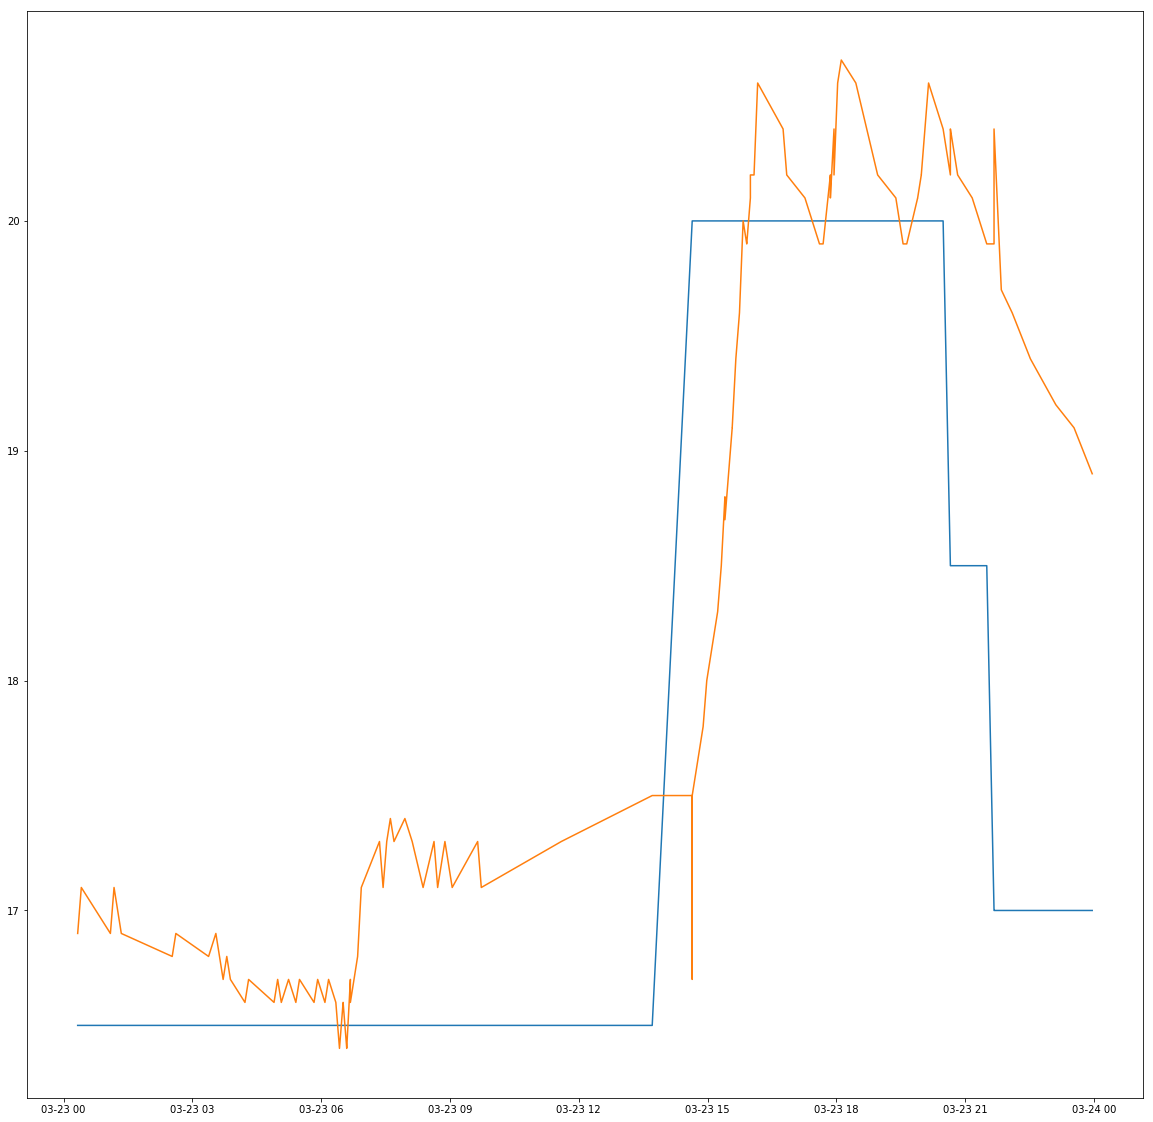

In [106]:
dates = matplotlib.dates.date2num(state_climate_living_room['last_updated'])
fig1 = matplotlib.pyplot.figure(figsize=[20,20])
matplotlib.pyplot.plot_date(dates, set_temp, '-')
matplotlib.pyplot.plot_date(dates, current_temp, '-');